# 04/05 - Pair Programming Estadística II - Lidia y Tatiana

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("./googleplaystore.csv",index_col = 0)
pd.options.display.max_columns=None
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



# EJERCICIO 1

**Extraer las siguentes estadísticas del conjunto de datos para varias de las varibles disponibles:**

In [5]:
df= df[df["Category"].isin(["DATING", "HEALTH_AND_FITNESS" , "FINANCE"])]
#Hemos reducido la información del Data set a estos 3 segmentos.

In [6]:
df_rating= df["Rating"]
df_rating.head().reset_index() # Vimos los valores de "rating" para comprobar sí tenia nulos

,App,Rating
0,"Moco+ - Chat, Meet People",4.2
1,Calculator,2.6
2,Truth or Dare Pro,NaN
3,"Private Dating, Hide App- Blue for PrivacyHider",NaN
4,Ad Blocker for SayHi,NaN


In [7]:
df_rating= df_rating.dropna() # Hemos decidido eliminar los nulos para que no afecte al cálculo de los estadísticos.

**- Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo**

In [8]:
df.describe()   #nos da los datos de "Rating" unicamente ya que es de tipo float 64 y todos los demás son object. 

,Rating
count,815.000000
mean,4.146258
std,0.640587
min,1.000000
25%,4.000000
50%,4.300000
75%,4.600000
max,5.000000


In [32]:
print("Mediana:",df.median())

Mediana: Rating    4.3
dtype: float64


/var/folders/rp/8_fhdgqx4mv2kkv4dswj4tq40000gn/T/ipykernel_4733/2738199712.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Mediana:",df.median())


In [10]:
print("Moda:",df["Rating"].mode())

Moda: 0    4.4
dtype: float64


**- Percentiles 25, 75**

In [11]:
percentil25= np.percentile(df_rating,25,axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
print("El percentil 25 es:", percentil25)

percentil75= np.percentile(df_rating,75,axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
print("El percentil 75 es:", percentil75)

El percentil 25 es: 4.0
El percentil 75 es: 4.6


**- Rango Intercualtílico**

In [12]:
q3,q1=np.percentile(df_rating, [75,25])
riq= q3 - q1

print("Rango interquartílico:", riq)

Rango interquartílico: 0.5999999999999996


**- Boxplot de algunas variables**

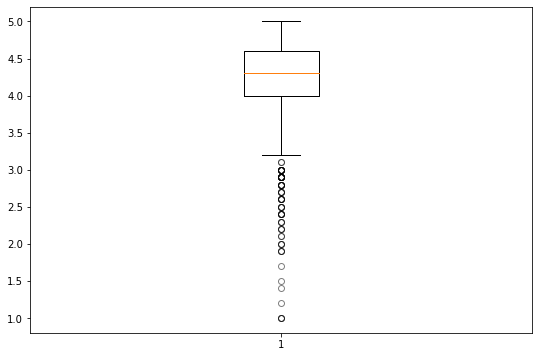

In [13]:
fig = plt.figure(1, figsize=(9, 6))

ax = fig.add_subplot(111)
bp = ax.boxplot(df_rating)

# En 'fliers' se guardan aquellos datos que se encuentran más aislados de los demás (outliers)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

**- Tabla de frecuencias**

In [15]:
df.head() #Recordamos DF

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
Truth or Dare Pro,DATING,NaN,0,20M,50+,Paid,$1.49,Teen,Dating,"September 1, 2017",1.0,4.0 and up
"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,18k,100+,Paid,$2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
Ad Blocker for SayHi,DATING,NaN,4,1.2M,100+,Paid,$3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3 and up


>Variables cualitativas

In [16]:
df["Genres"].unique() #Queremos ver las diferentes temas que nos encontramos en género.

array(['Dating', 'Finance', 'Health & Fitness'], dtype=object)

In [17]:
#Para calcular la frecuencia con la que aparecen los diferentes géneros.
df_genres= df.groupby("Genres") #Primero agrupamos
frecuencia_genres = df_genres.agg(frecuencia= ("Genres", "count")) # Conteo de los datos ya agrupados
print("Cantidad de Apps por categoria:",frecuencia_genres)

Cantidad de Apps por categoria:                   frecuencia
Genres                      
Dating                   234
Finance                  366
Health & Fitness         341


>Variables cuantitativas

In [39]:
df["Rating"].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [41]:
# Frecuencia de las valoraciones 
df= df.groupby("Rating")
frecuencia_rating = df.agg(frecuencia= ("Rating", "count"))
print("Frecuencia de valoraciones:",frecuencia_rating)

Frecuencia de valoraciones:         frecuencia
Rating            
1.0             16
1.2              1
1.4              3
1.5              3
1.6              4
1.7              8
1.8              8
1.9             13
2.0             12
2.1              8
2.2             14
2.3             20
2.4             19
2.5             21
2.6             25
2.7             25
2.8             42
2.9             45
3.0             83
3.1             69
3.2             64
3.3            102
3.4            128
3.5            163
3.6            174
3.7            239
3.8            303
3.9            386
4.0            568
4.1            708
4.2            952
4.3           1076
4.4           1109
4.5           1038
4.6            823
4.7            499
4.8            234
4.9             87
5.0            274
19.0             1


>Frecuencia acumulada

In [49]:
df= pd.read_csv("./googleplaystore.csv",index_col = 0)
pd.options.display.max_columns=None
df= df[df["Category"].isin(["DATING", "HEALTH_AND_FITNESS" , "FINANCE"])]
df.head()

#Leemos de nuevo el DF, ya que hemos realizado modificaciones en "Rating", y 
#queremos los valores y el estado del DF inicial, para no tener que volver a leer, en otros ejercicios, realizaremos copias de los DF originales.

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
Truth or Dare Pro,DATING,NaN,0,20M,50+,Paid,$1.49,Teen,Dating,"September 1, 2017",1.0,4.0 and up
"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,18k,100+,Paid,$2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
Ad Blocker for SayHi,DATING,NaN,4,1.2M,100+,Paid,$3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3 and up


In [50]:
df.shape

(941, 12)

In [51]:
df= df[df["Category"].isin(["DATING", "HEALTH_AND_FITNESS" , "FINANCE"])]

bins = np.arange(1, 5+0.5, 0.5)

df["Rating"] = pd.cut(df["Rating"], bins=bins)
df_agrupado = df.groupby("Rating")
df_agrupado_2 =  df_agrupado.agg(frecuencia=("Rating", "count"))

#Calculamos una nueva columna del DataFrame llamada frecuencia acumulada usando cumsum() sobre la frecuencia
df_agrupado_2["frecuencia_acumulada"] = df_agrupado_2["frecuencia"].cumsum()
#Visualizamos el dataframe resultado
df_agrupado_2

,frecuencia,frecuencia_acumulada
Rating,,
"(1.0, 1.5]",3,3
"(1.5, 2.0]",7,10
"(2.0, 2.5]",17,27
"(2.5, 3.0]",33,60
"(3.0, 3.5]",53,113
"(3.5, 4.0]",127,240
"(4.0, 4.5]",367,607
"(4.5, 5.0]",205,812


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941 entries, Moco+ - Chat, Meet People to Gold Quote - Gold.fr
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Category        941 non-null    object  
 1   Rating          812 non-null    category
 2   Reviews         941 non-null    object  
 3   Size            941 non-null    object  
 4   Installs        941 non-null    object  
 5   Type            941 non-null    object  
 6   Price           941 non-null    object  
 7   Content Rating  941 non-null    object  
 8   Genres          941 non-null    object  
 9   Last Updated    941 non-null    object  
 10  Current Ver     941 non-null    object  
 11  Android Ver     941 non-null    object  
dtypes: category(1), object(11)
memory usage: 89.6+ KB


In [53]:
df['Reviews'] = df['Reviews'].astype('int64') # "Reviews" aparece como object y necesitamos que sea de tipo int64 para poder realizar los analisis que necesitamos, por ello cambiamos su forma.

In [54]:
df["Reviews"] = pd.cut(df["Reviews"], 5) 
df_agrupadox = df.groupby("Reviews")
df_agrupado_2x =  df_agrupadox.agg(frecuencia=("Reviews", "count"))

#Calculamos una nueva columna del DataFrame llamada frecuencia acumulada usando cumsum() sobre la frecuencia
df_agrupado_2x["frecuencia_acumulada"] = df_agrupado_2x["frecuencia"].cumsum()
df_agrupado_2x

,frecuencia,frecuencia_acumulada
Reviews,,
"(-4559.407, 911881.4]",932,932
"(911881.4, 1823762.8]",3,935
"(1823762.8, 2735644.2]",5,940
"(2735644.2, 3647525.6]",0,940
"(3647525.6, 4559407.0]",1,941


>Representación de al menos una tabla de frecuencias

<font color=violet>Cualitativa

<AxesSubplot:xlabel='Genres'>

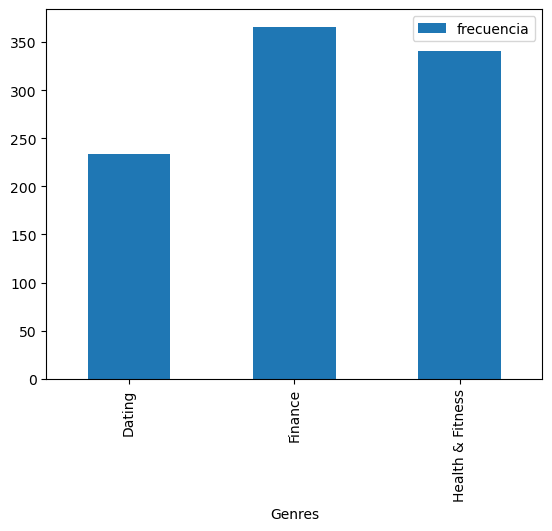

In [26]:
plt.rcdefaults()

tabla_frecuencia = df.groupby("Genres") #agrupamos los datos de la columna "Genres"
frecuencias_cualitativa = tabla_frecuencia.agg(frecuencia=("Genres", "count"))  #Pedimos conteo rto de agrupar

frecuencias_cualitativa.plot.bar() # Representamos en gráfica.



<font color=violet>Cuantitativa

<AxesSubplot:xlabel='Rating', ylabel='Count'>

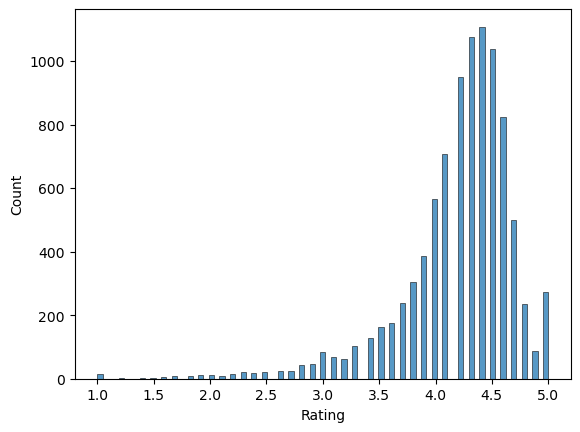

In [63]:
sns.histplot(df_rating.reset_index(),x="Rating") #Utilizamos Seaborn, por que tenemos problemas con este Dataset y Matplotlib.

# EJERCICIO 2

**Interpretación de los resultados.**

**Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo incapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.**


La explicación de los resultados, está al final de cada ejercicio.

 <font color=yellow>Nuestro DF  es sobre las Apps de Apps store </font> 


👉🏻 *Rating*:  Es la valoración que los usuarios dan a las Apps de 0 a 5 ⭐️⭐️⭐️⭐️⭐️

- Mean : Es la media  de calificación de las aplicaciones es de 4.14 en el varemo de 0 a 5.

- Std: La desviación típica de 0.64 nos muestra al tener valor entre 0 y 1, nos indica que los valores están agrupados cerca de su media.

- Min: Es el valor mínimo de los datos, en nuestro caso la mínima puntuación fué de 1

- Max: Es el valor máximo de los datos, en nuestro caso la máxima puntuación fué de 5

- 25%: Significa que el 25% de los usuarios dieron la misma nota hasta 4.0 

- 50%: Significa que el 50% de los usuarios dieron la misma nota de 4.0 a 4.3

- 75%: Significa que el 75% de los usuarios dieron la misma nota de 4.3 a 4.6

- Median(): Es la posición central que parte la distribución en dos, en nuestro caso, tomamos 4.3 como la mediana.

- Mode(): 4.4 es la calificación que más se repite entre los usuarios.

- Rango intercuartílico:  es un medida de dispersión de un conjunto de datos que expresa la diferencia o la distancia entre el primer y el tercer cuartil de una distribución utilizado en el diagrama de caja, en nuestro caso esta distancia es de 0.5999999999999996.

- Variables cualitativa:   Identificamos que en google store, existen 366 Apps de "Fianzas" , 341 Apps de "Health & Fitness" y 234 de "Dating"

- Variable cuantitativa:   Identificamos  la frecuencia de cada puntuación.

- Frecuencia acumulada:     Se representa la frecuencia de cada uno de los datos pero en divisiones o "rangos" , bins.